###  Import Data and Required Packages
**Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

**Import the CSV Data as Pandas DataFrame**

In [2]:
df=pd.read_csv('data/google_missing_imputed.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up,25,7,2017
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up,6,7,2018
10837,Parkinson Exercices FR,MEDICAL,2.7,3,9.5,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up,20,1,2017
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,7.4,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,19,1,2015


####  First missing value imputation
####  Second outlier detection and handling

In [ ]:
1
2
3
43
4
4
23
324
342324
4
nan
nan
32
3
8
9
nan

In [ ]:
324,342324 is outlier

In [3]:
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
Day               0
Month             0
Year              0
dtype: int64

In [4]:
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year
7188,CD Padel Mora,SPORTS,4.8,1,7.2,50,Free,0.0,Everyone,Sports,2018-06-14,7.3,4.0 and up,14,6,2018
7119,CB Background - Free HD Wallpaper Images,PERSONALIZATION,4.1,4538,3.3,1000000,Free,0.0,Everyone,Personalization,2018-03-24,3.1.0,4.0 and up,24,3,2018
2580,Kate Mobile for VK,SOCIAL,4.4,540930,5.3,10000000,Free,0.0,Teen,Social,2018-07-23,50.2 lite,2.2 and up,23,7,2018
7865,CT Brain Interpretation,FAMILY,5.0,3,29.0,500,Free,0.0,Everyone,Education,2018-07-04,5.0.16,4.0 and up,4,7,2018
92,Fuelio: Gas log & costs,AUTO_AND_VEHICLES,4.6,65786,27.0,1000000,Free,0.0,Everyone,Auto & Vehicles,2018-08-02,Varies with device,4.0.3 and up,2,8,2018


In [5]:
df.shape

(10840, 16)

In [6]:
num_features=[col for col in df.columns if df[col].dtype!='O']
num_df = df[num_features]
num_df.head()

,Rating,Reviews,Size,Installs,Price,Day,Month,Year
0,4.1,159,19.0,10000,0.0,7,1,2018
1,3.9,967,14.0,500000,0.0,15,1,2018
2,4.7,87510,8.7,5000000,0.0,1,8,2018
3,4.5,215644,25.0,50000000,0.0,8,6,2018
4,4.3,967,2.8,100000,0.0,20,6,2018


### Z-score  method
#### Z-score:
- The number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean.
- while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.

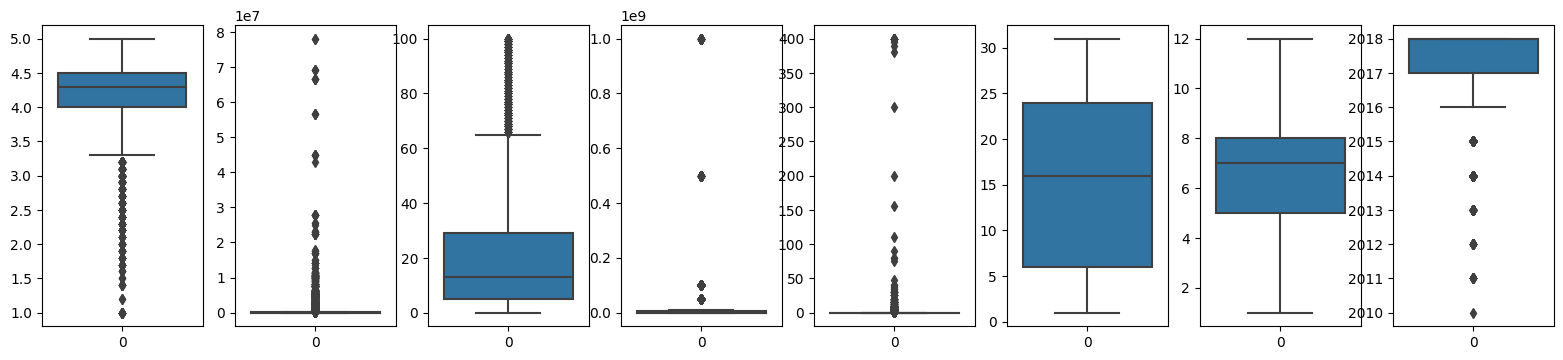

In [7]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- Except Day and month feature we have outliers in all other features.

In [8]:
# Function to detect outliers
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [9]:
## function to remove outliers
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [10]:
replace_with_thresholds(num_df, num_df.columns)

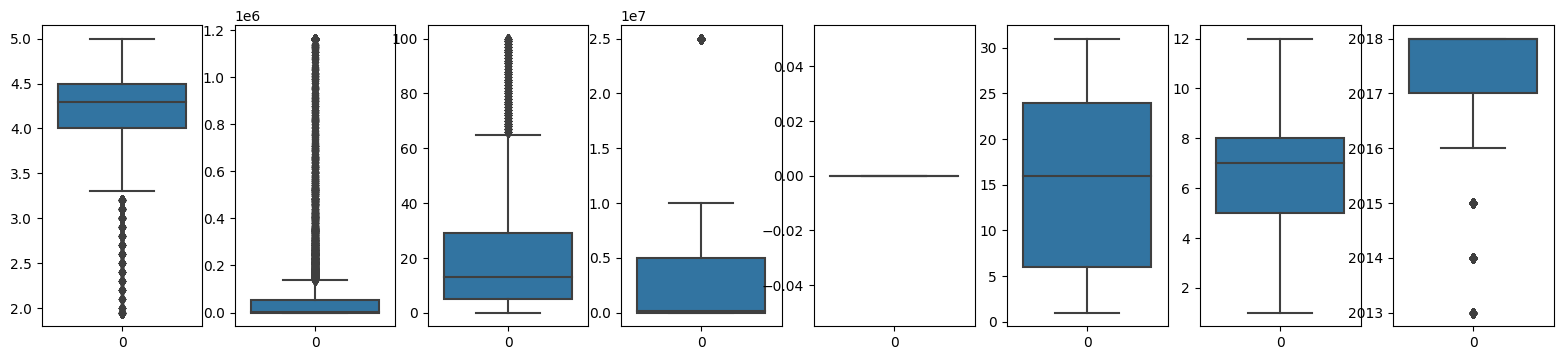

In [11]:
plt.figure(figsize=(22,18))
for i,col in enumerate(num_df.columns):
    plt.subplot(4,9,i+1)
    sns.boxplot(num_df[col])

#### Insights
- As we can see from above boxplots outliers are not removed properly

### Interquartile Range Method( IQR ) method

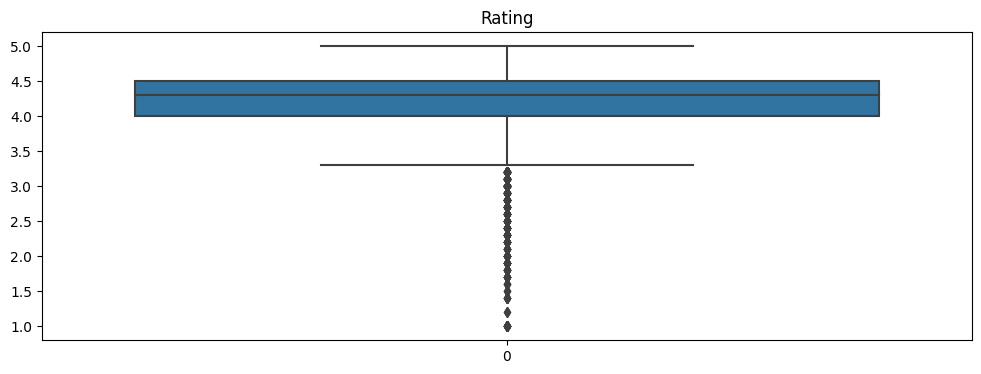

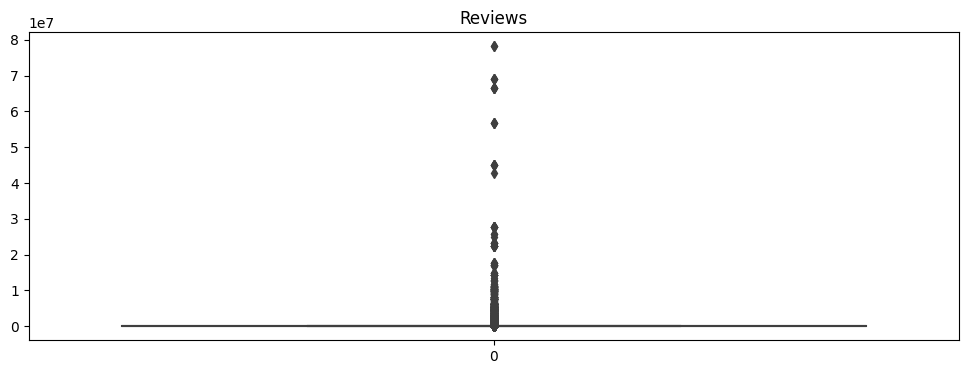

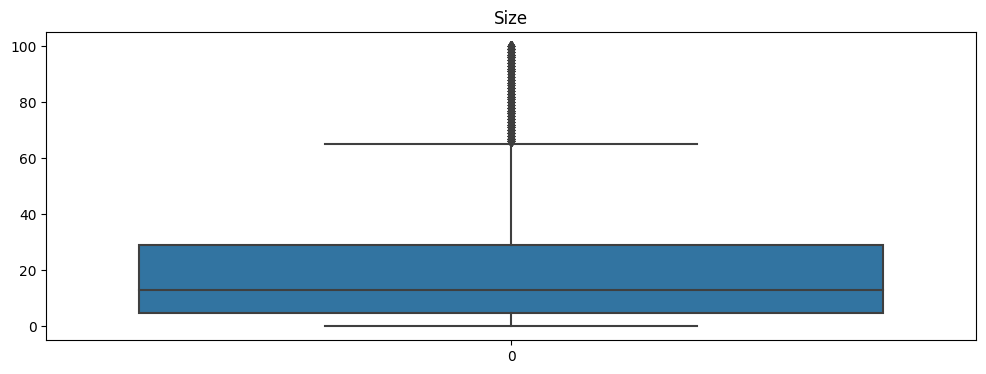

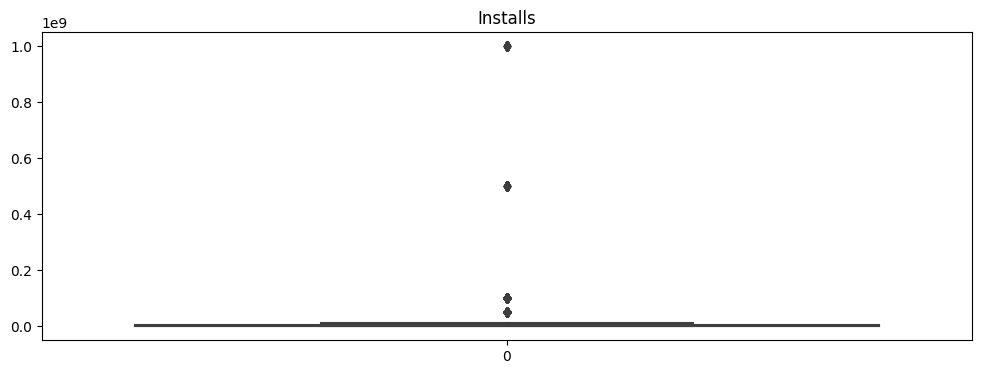

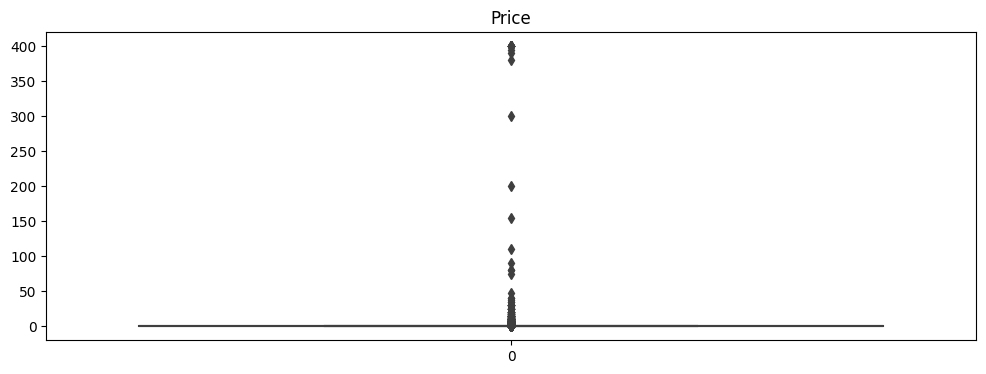

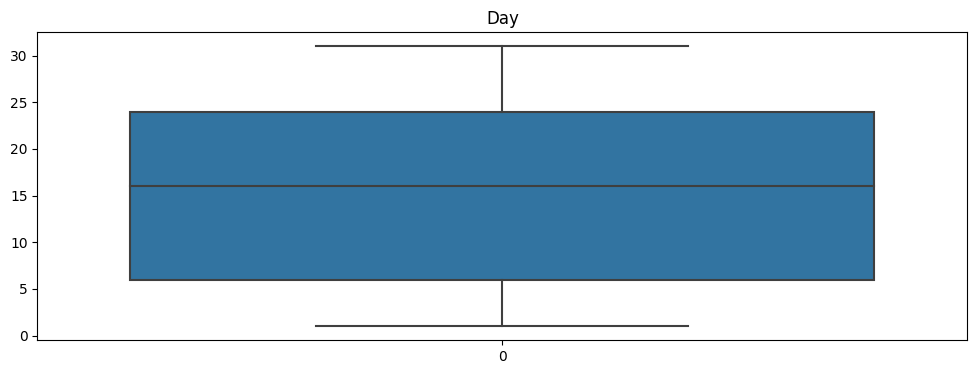

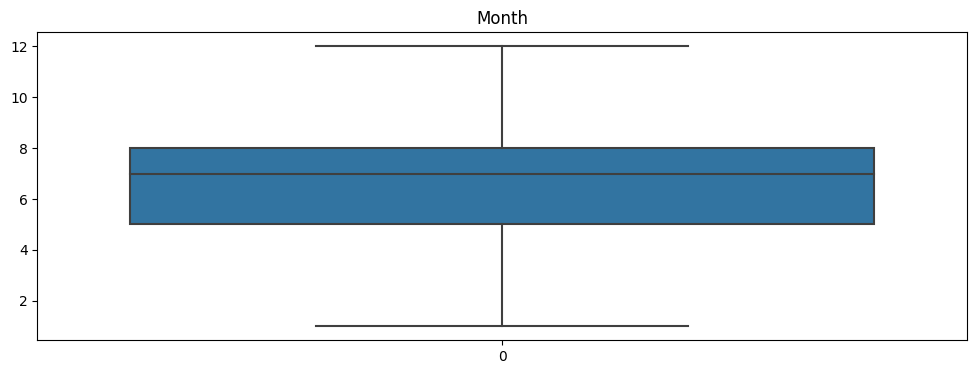

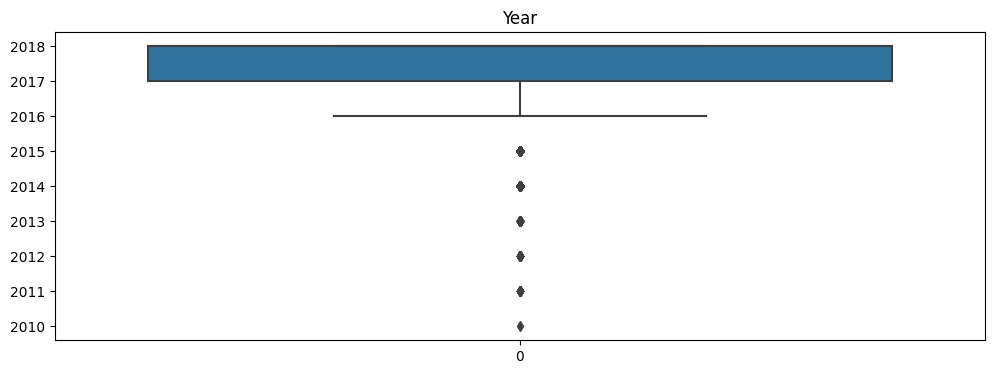

In [12]:
for col in num_df.columns:
    plt.figure(figsize=(12,4))
    sns.boxplot(df[col])
    plt.title(col)

In [13]:
df1 = df.copy()
def remove_outliers_IQR(col):
    # Finding the IQR
    percentile25 = df1[col].quantile(0.25)
    percentile75 = df1[col].quantile(0.75)
    print("percentile25",percentile25)
    print("percentile75",percentile75)
    iqr = percentile75 - percentile25
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    print("Upper limit",upper_limit)
    print("Lower limit",lower_limit)
    df1[col] = np.where(df1[col]>upper_limit, upper_limit, np.where(df1[col]<lower_limit,lower_limit,df1[col]))
    return df1[df1[col] > upper_limit]

In [14]:
remove_outliers_IQR('Size')

percentile25 4.9
percentile75 29.0
Upper limit 65.15
Lower limit -31.250000000000007


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


In [15]:
def create_comparison_plot(df,df1,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df[column])

    plt.subplot(2,2,2)
    sns.boxplot(df[column])

    plt.subplot(2,2,3)
    sns.distplot(df1[column])

    plt.subplot(2,2,4)
    sns.boxplot(df1[column])

    plt.show()

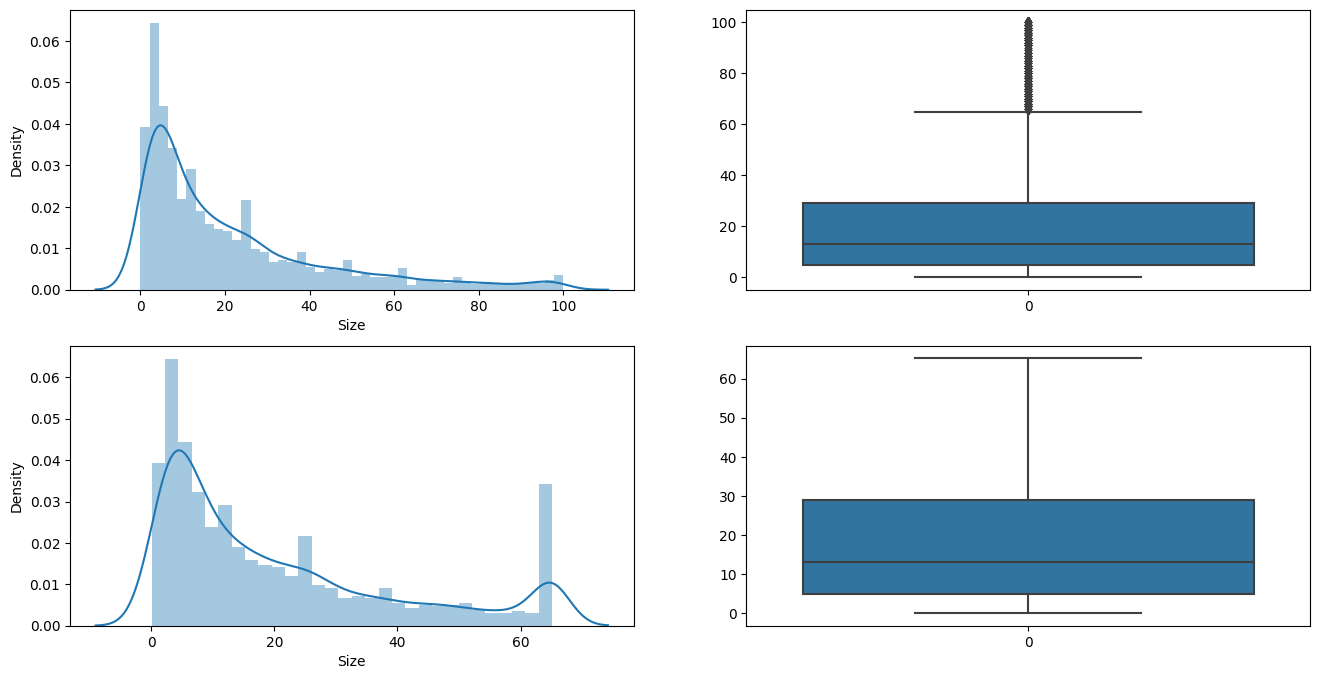

In [16]:
create_comparison_plot(df,df1,"Size")

In [17]:
remove_outliers_IQR('Rating')

percentile25 4.0
percentile75 4.5
Upper limit 5.25
Lower limit 3.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


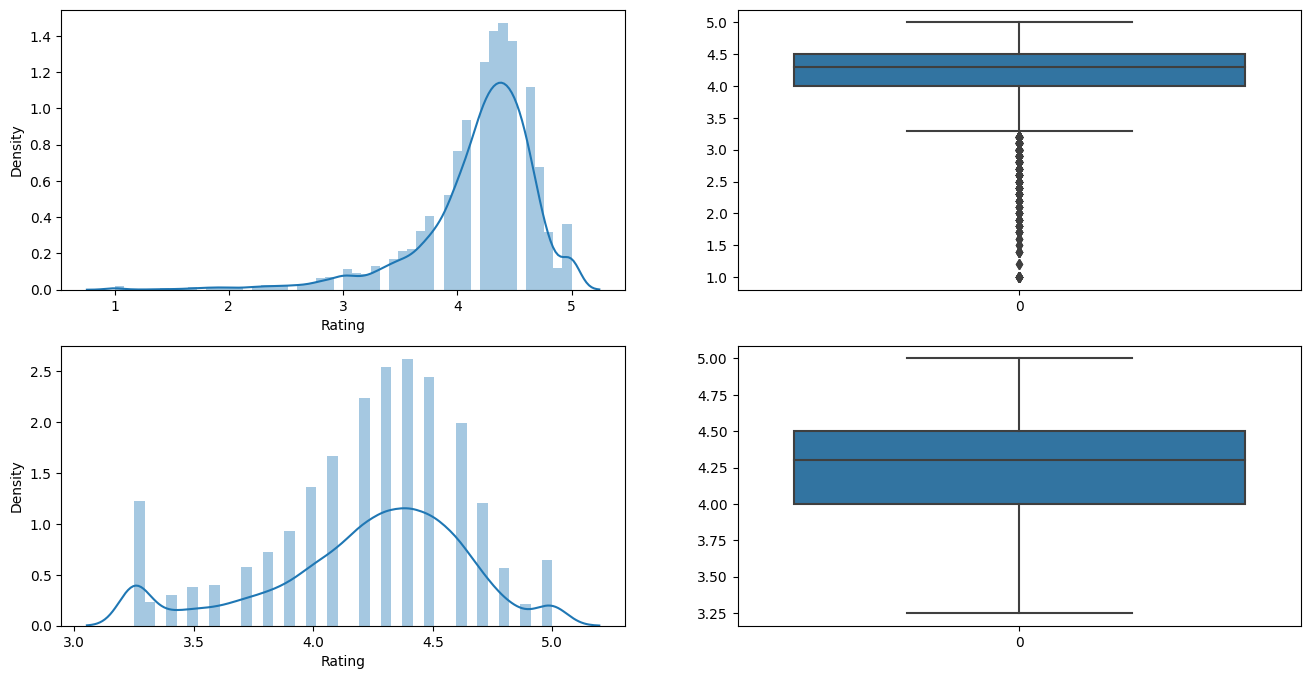

In [18]:
create_comparison_plot(df,df1,"Rating")

In [19]:
remove_outliers_IQR('Reviews')

percentile25 38.0
percentile75 54775.5
Upper limit 136881.75
Lower limit -82068.25


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


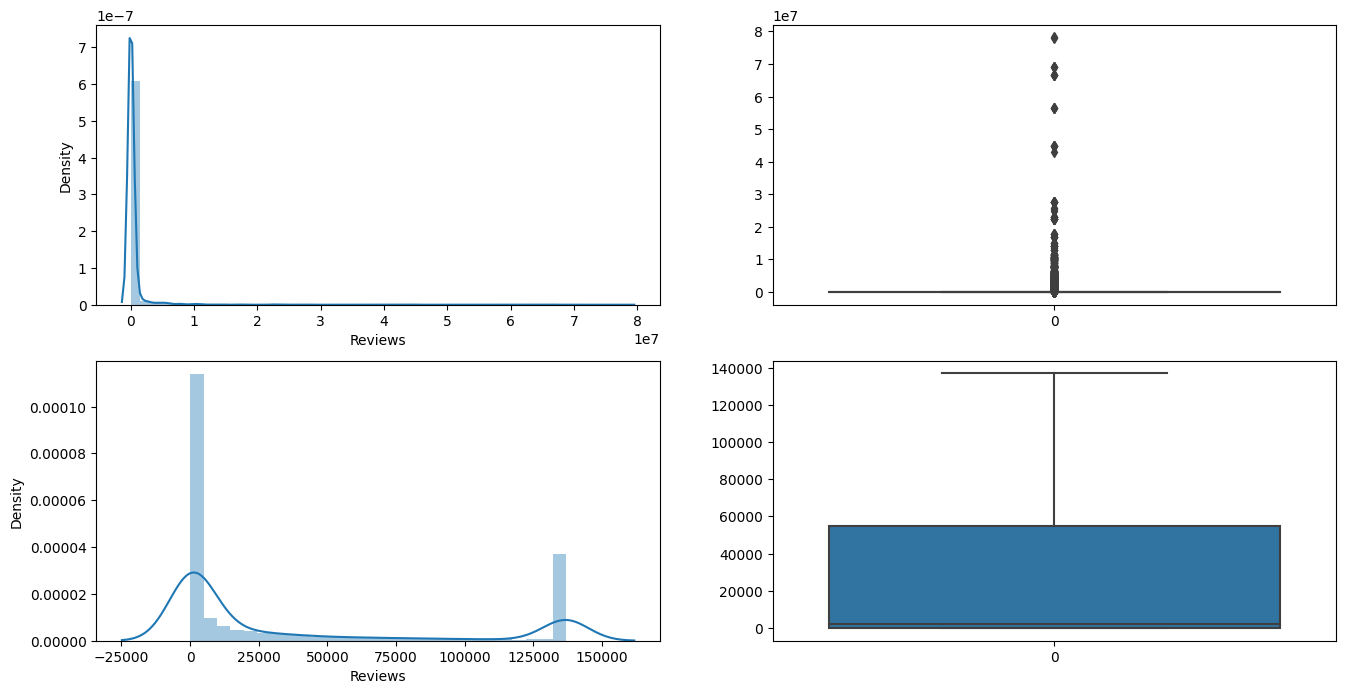

In [20]:
create_comparison_plot(df,df1,"Reviews")

In [21]:
remove_outliers_IQR('Installs')

percentile25 1000.0
percentile75 5000000.0
Upper limit 12498500.0
Lower limit -7497500.0


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


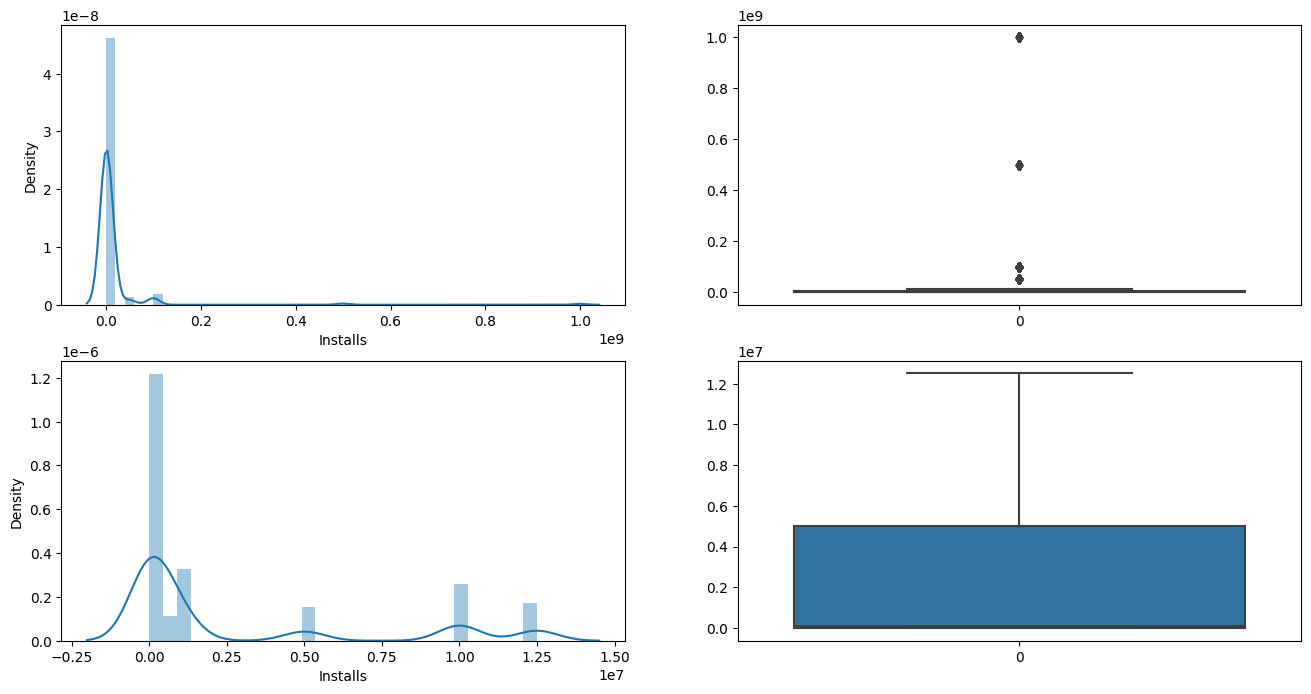

In [22]:
create_comparison_plot(df,df1,"Installs")

In [23]:
remove_outliers_IQR('Year')

percentile25 2017.0
percentile75 2018.0
Upper limit 2019.5
Lower limit 2015.5


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Day,Month,Year


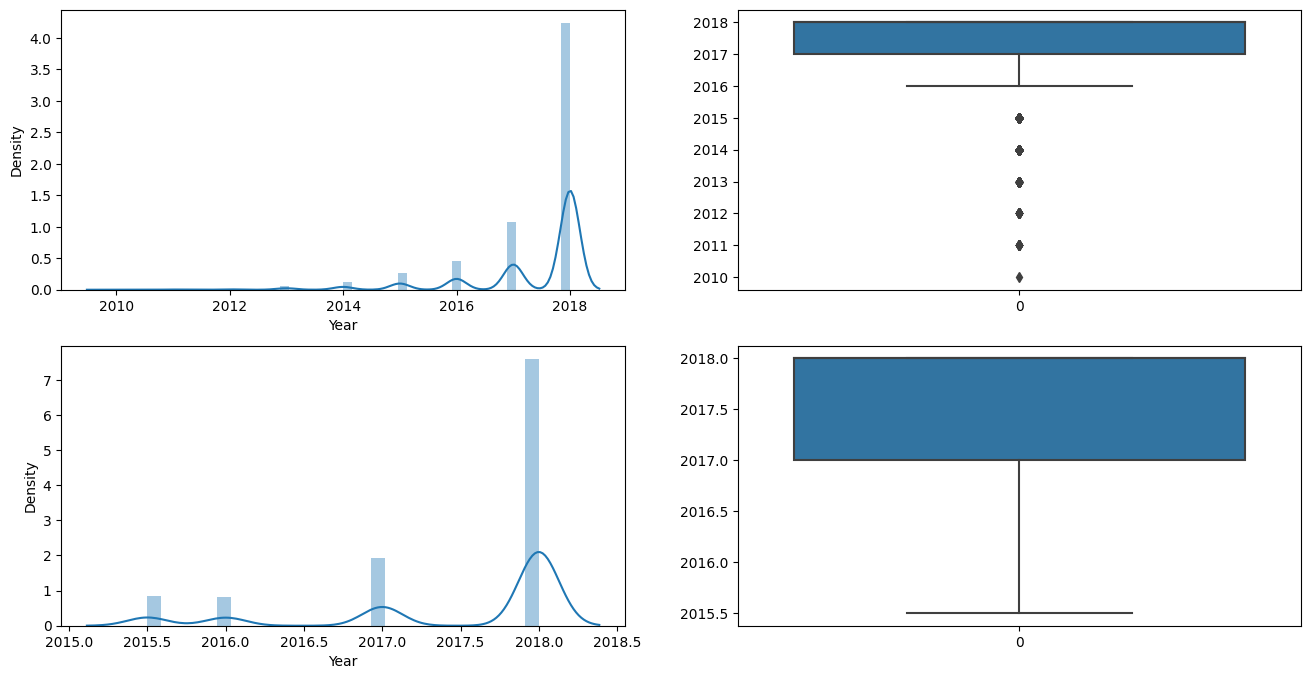

In [24]:
create_comparison_plot(df,df1,"Year")

### Compare Skewness

In [25]:
df.skew()

Rating      -1.847930
Reviews     16.449584
Size         1.558689
Installs     9.572067
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -2.288293
dtype: float64

In [26]:
df1.skew()

Rating      -0.680127
Reviews      1.197882
Size         1.091164
Installs     1.384312
Price       23.707392
Day         -0.002569
Month       -0.114442
Year        -1.371946
dtype: float64

#### Insights
- Skewness is reduced after we have removed ouliers using IQR Method

In [27]:
df1.to_csv('data/google_outliers.csv',index=False)